<a href="https://colab.research.google.com/github/besherh/Machine-Learning-Course/blob/master/Clustering/HierarchicalClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
#load the dataset 
#download the dataset from our Github page
#https://github.com/besherh/Machine-Learning-Course/blob/master/1-Introduction/data_sets/iris.csv

iris = pd.read_csv("https://raw.githubusercontent.com/besherh/Machine-Learning-Course/master/1-Introduction/data_sets/Iris.csv")

In [4]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Iris data set includes 150 data points. We will only use the first 50 data points so that the dendrogram seems more clear.


In [15]:
iris = iris.head(50)
iris.shape

(50, 6)

In [22]:
#building the input for the model ( 4 attributes :SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm )
x = iris. iloc[:, [1, 2, 3, 4]].values


Then we import AgglomerativeClustering class and build a model.


In [19]:
from sklearn.cluster import AgglomerativeClustering
#refer to 
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)


Keep in mind that if distance_threshold parameter is not None, n_cluster parameter must be None. I do not set any condition just to visualize a complete tree.
Next step is to fit model to the data:


In [23]:
model = model.fit(x)


Before drawing a dendrogram, we can check the details of our model using available methods:


In [24]:
# Number of clusters
model.n_clusters_


50

In [26]:
# Distances between clusters
distances = model.distances_
distances.min()


0.0

In [27]:
distances.max()


3.875843603186748

Scikit learn does not provide dendrograms so we will use the dendrogram of SciPy package.


In [28]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy


We first create a linkage matrix:


In [29]:
Z = hierarchy.linkage(model.children_, 'ward')


We use the children from the model and a linkage criterion which I choose to be ‘ward’ linkage.





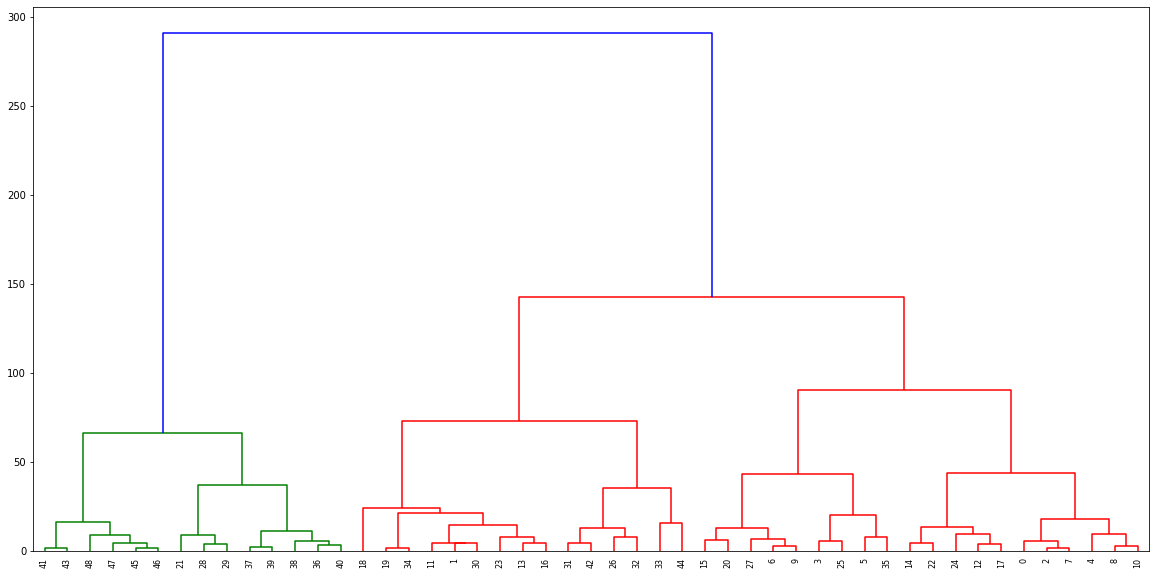

In [32]:
plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(Z)


The labels of leafs are the indices of data points.
We can control the number of cluster by adjusting distance_thresold or n_cluster parameters. Let’s check the calculated distances between clusters:



In [33]:
model.distances_


array([0.        , 0.        , 0.1       , 0.1       , 0.1       ,
       0.14142136, 0.14142136, 0.14142136, 0.14142136, 0.14142136,
       0.14142136, 0.17320508, 0.17320508, 0.17320508, 0.18257419,
       0.2       , 0.21602469, 0.21602469, 0.24494897, 0.25819889,
       0.28284271, 0.28982753, 0.29439203, 0.29439203, 0.31358146,
       0.33166248, 0.33665016, 0.34641016, 0.34778209, 0.35182066,
       0.36968455, 0.42229532, 0.43969687, 0.44521263, 0.46726153,
       0.54772256, 0.59441848, 0.6244998 , 0.6363961 , 0.66269651,
       0.75535128, 0.83740671, 0.85556999, 0.85780728, 1.10513951,
       1.29839645, 1.39697997, 1.86837719, 3.8758436 ])

Distances are in ascending order. If we can set the distance_thresold as 0.8, number of clusters will be 9. There are 8 distances greated than 0.8 so, when combined, 9 clusters will be formed.


In [34]:
model = AgglomerativeClustering(distance_threshold=0.8, n_clusters=None)
model = model.fit(x)
model.n_clusters_


9